# Simple test of matrix completion methods

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *
from nopt.tests import *
from nopt.benchmarks import *
from scipy.linalg import hadamard
import scipy.sparse as sparse

In [48]:
m = 100
n = 100

rho_r = 0.5
delta = 0.5

p = round(delta*m*n)

r = round(.5*( m+n - np.sqrt( (m+n)**2 - 4*rho_r*p ) ))

l0, _ = GenerateLSMat1((m,n), r, 0, 1)
HTr = FixedRank(r)

Amat = np.random.normal(0,1, (p,m*n)) / np.sqrt(m*n)
A1 = LinearMatrix(Amat, shape_input = (m,n))
#A2 = FastJLT(shape_input = (m,n), shape_output= (p,1))
mask = np.random.choice(a=[True, False], size=(m, n), p=[delta, 1-delta])
A3 = EntryWise(mask)
b = A1.matvec(l0)

NameError: name 'matrix' is not defined

In [69]:
subsample = sparse.identity(m*n, dtype='float')

In [70]:
subsample[mask,]

TypeError: 'dia_matrix' object is not subscriptable

In [94]:
mask.reshape(1,-1).astype('float').tolist()

AttributeError: 'list' object has no attribute 'shape'

In [29]:
problem = LinearProblem(A1, b, HTr)

In [30]:
solver = NIHT(logverbosity = 2)
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm	     xdist
    1	+6.4956212689144277e+03	2.58448947e+01
    2	+3.5066305212340280e+03	2.31502500e+01
    3	+1.9181503016739994e+03	1.47037154e+01
    4	+1.1167648166214744e+03	1.08306345e+01
    5	+7.4877019115897997e+02	8.55479233e+00
    6	+5.1329687521328435e+02	6.89615515e+00
    7	+3.6561658770751558e+02	5.81911975e+00
    8	+2.6434826429127651e+02	4.87500395e+00
    9	+1.9614410591959847e+02	4.17578137e+00
   10	+1.4673536481371610e+02	3.59762566e+00
   11	+1.1191836974623858e+02	3.10463447e+00
   12	+8.5827219004060140e+01	2.71495877e+00
   13	+6.6825142023791543e+01	2.37356411e+00
   14	+5.2257141701644180e+01	2.08829034e+00
   15	+4.1357221997264027e+01	1.85135106e+00
   16	+3.2856609273126608e+01	1.63312235e+00
   17	+2.6349565478259841e+01	1.46555806e+00
   18	+2.1205253951169343e+01	1.29517255e+00
   19	+1.7190817927076079e+01	1.17494039e+00
   20	+1.3981543332816360e+01	1.03930884e+00
   21	+1.1436432518703064e+01	9.52955302e-01
   22	+9

In [130]:
np.linalg.norm(x - l0, 'fro')/ np.linalg.norm(l0, 2)

3.2907307074510395

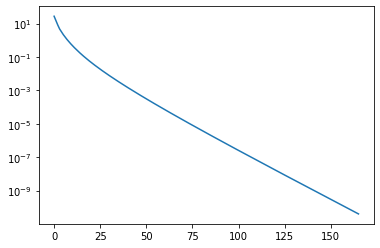

In [131]:
plt.semilogy(opt_log['iterations']['fx'] / np.linalg.norm(b))